<a href="https://colab.research.google.com/github/nghiahuynh34/TypesOfCyperAttacks/blob/main/trojan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>1 | Preprocessing Steps</div></b>

### <b><span style='color:#DEB078'>1.1 |</span><span style='color:#016CC9'> Import Libraries</span></b>  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re
from sklearn.preprocessing import StandardScaler
# 10000, 1, 100

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output
from sklearn import model_selection,preprocessing,linear_model,metrics

### <b><span style='color:#DEB078'>1.2 |</span><span style='color:#016CC9'> Import Files</span></b>    

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/file/kddcup.csv")


## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>2 | Dataframe Investigation</div></b>

### <b><span style='color:#DEB078'>2.1 |</span><span style='color:#016CC9'> Basic Steps</span></b>

In [ ]:
df.shape

(396691, 42)

In [ ]:
pd.value_counts(df.dtypes)

int64      23
float64    15
object      4
dtype: int64

In [ ]:
# Information of datas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396691 entries, 0 to 396690
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     396691 non-null  int64  
 1   protocol_type                396691 non-null  object 
 2   service                      396691 non-null  object 
 3   flag                         396691 non-null  object 
 4   src_bytes                    396691 non-null  int64  
 5   dst_bytes                    396691 non-null  int64  
 6   land                         396691 non-null  int64  
 7   wrong_fragment               396691 non-null  int64  
 8   urgent                       396691 non-null  int64  
 9   hot                          396691 non-null  int64  
 10  num_failed_logins            396691 non-null  int64  
 11  logged_in                    396691 non-null  int64  
 12  num_compromised              396691 non-null  int64  
 13 

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,telnet,S0,0,0,0,0,0,0,...,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0,neptune.
1,0,tcp,telnet,S0,0,0,0,0,0,0,...,16,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0,neptune.
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0,smurf.
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0,smurf.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0,smurf.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,396691.0,6.611148,4.025875e+02,0.0,0.00,0.0,0.00,42448.0
src_bytes,396691.0,3484.103826,1.102676e+06,0.0,0.00,1032.0,1032.00,693375640.0
dst_bytes,396691.0,250.960559,3.180015e+04,0.0,0.00,0.0,0.00,5155468.0
land,396691.0,0.000053,7.275662e-03,0.0,0.00,0.0,0.00,1.0
wrong_fragment,396691.0,0.008011,1.503945e-01,0.0,0.00,0.0,0.00,3.0
urgent,396691.0,0.000008,3.550246e-03,0.0,0.00,0.0,0.00,2.0
hot,396691.0,0.031889,7.618824e-01,0.0,0.00,0.0,0.00,28.0
num_failed_logins,396691.0,0.000141,1.384072e-02,0.0,0.00,0.0,0.00,5.0
logged_in,396691.0,0.008198,9.017002e-02,0.0,0.00,0.0,0.00,1.0
num_compromised,396691.0,0.005561,1.041348e-01,0.0,0.00,0.0,0.00,38.0


In [ ]:
# Check for null values for each attribute (column)
null_values_by_column = df.isnull().sum()

# Display the result
print("Null values by column:")
print(null_values_by_column)

Null values by column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate       

### <b><span style='color:#DEB078'>2.2 |</span><span style='color:#016CC9'> Null Value Check</span></b>

In [ ]:
# Display all unique values for each attribute (column)
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for duration: [    0    23    60     1     2     6     7    26   134    31     3    32
    67   192   179   198   156    41     9    10    12    14    27    28
    24    25    19    13    11     8     5     4  5057  5059  5051   337
   299 15161 15160 15168 15163 10127 10131 10128 10125 10132 10129 10134
 10120 10121  5079  5083  5085  5081  5084  5080  5076  5072  5055 15149
 15152 15157 15159 12546  5056  5039  5062  5041  5064  5043  5061  5049
  5048  5047  5044  5063  5068  5046  5052  5054  5058  5032  5040  5066
  5036  2426  5037  5053  5033  5042  5060 42448 42088 41065 40929 40806
 40682 40571 40448 40339 40232 40121 36783 36674 36570 36467 36323 36204
 32038 31925 31809 31709 31601 31501 31401 31301 31194 31061 30935 30835
 30735 30619 30518 30418 30317 30217 30077 25420 22921 22821 22721 22616
 22516 22416 22316 22216 21987 21887 21767 21661 21561 21455 21334 21223
 21123 20983 14682 14420 14319 14198 14098 13998 13898 13796 13678 13578
 13448 13348 13241 1314

In [ ]:
# display all value types of attacks
class_distribution = df['labels'].value_counts()
print(class_distribution)

smurf.           280790
neptune.         107201
back.              2203
satan.             1589
ipsweep.           1247
portsweep.         1040
warezclient.       1020
teardrop.           979
pod.                264
nmap.               231
guess_passwd.        53
land.                21
warezmaster.         20
imap.                12
ftp_write.            8
multihop.             7
phf.                  4
spy.                  2
Name: labels, dtype: int64


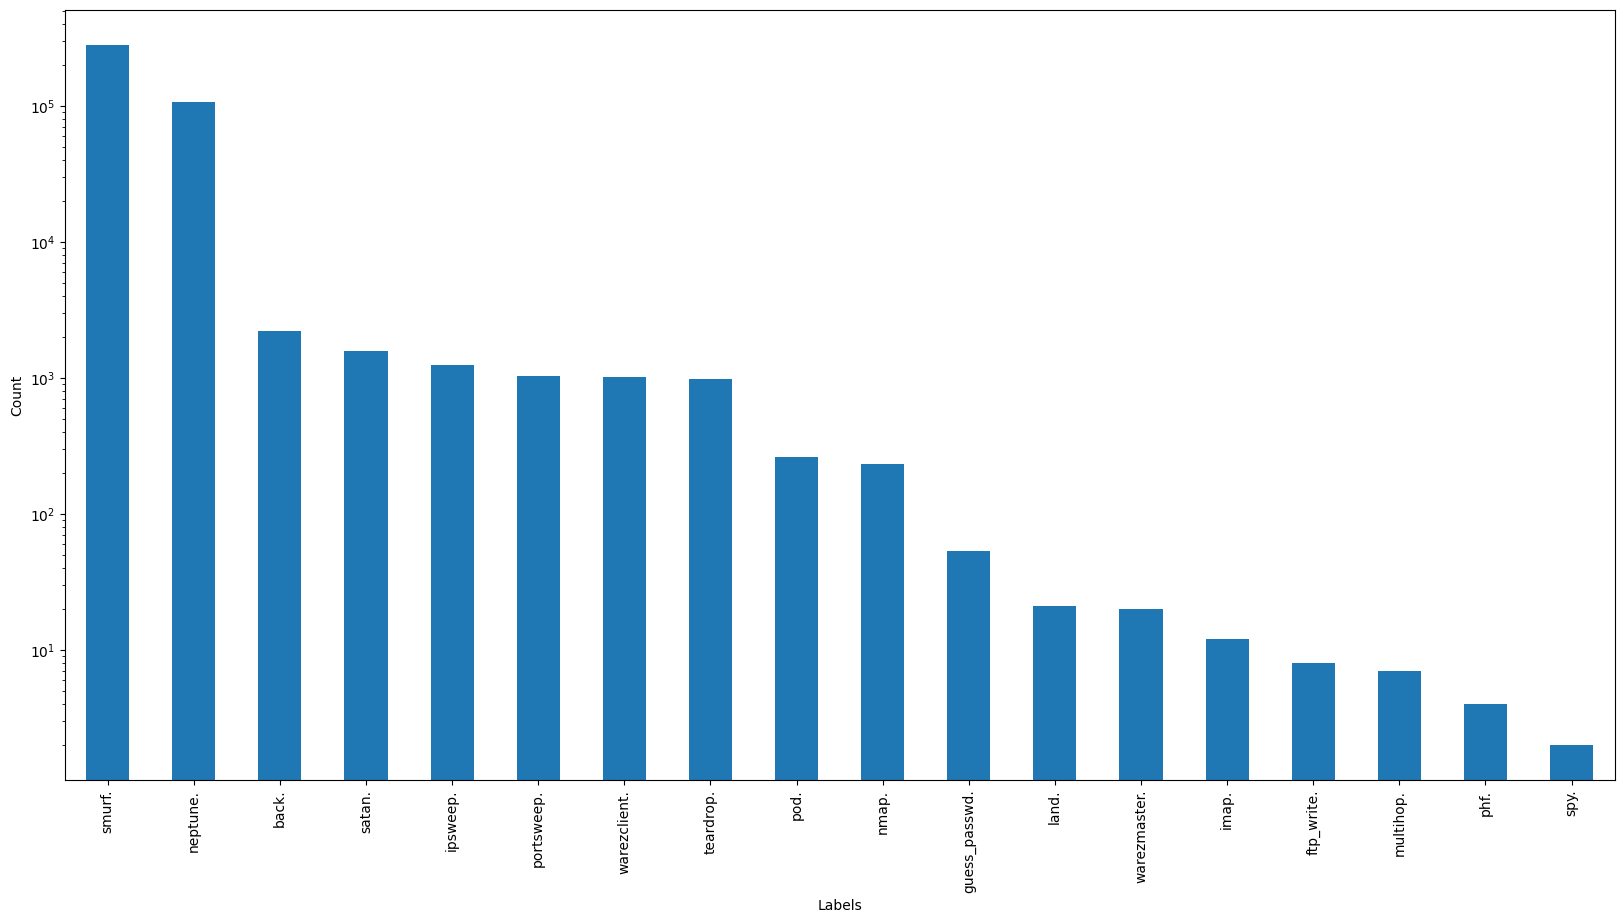

In [ ]:
plt.figure(figsize=(20,10))
plt.yscale("log")
df["labels"].value_counts().plot(kind="bar")
plt.ylabel("Count")
plt.xlabel("Labels")
plt.show()

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>3 | Handle Datas</div></b>

### <b><span style='color:#DEB078'>3.1 |</span><span style='color:#016CC9'> Transform all types of attack to common attacks</span></b>

In [ ]:
attack_families = {
    "back.": "dos",
    "ftp_write.": "r2l",
    "guess_passwd.": "r2l",
    "imap.": "r2l",
    "ipsweep.": "probe",
    "land.": "dos",
    "multihop.": "r2l",
    "neptune.": "dos",
    "nmap.": "probe",
    "phf.": "r2l",
    "pod.": "dos",
    "portsweep.": "probe",
    "satan.": "probe",
    "smurf.": "dos",
    "spy.": "r2l",
    "teardrop.": "dos",
    "warezclient.": "r2l",
    "warezmaster.": "r2l",
}

def map_attacks_to_families(attack):
    return attack_families[attack]
df['Class'] = df['labels'].apply(lambda attack: map_attacks_to_families(attack))
df = df.drop('labels',axis=1)
print(pd.unique(df["Class"]))

['dos' 'r2l' 'probe']


In [ ]:
# Display value counts each type of attacks
df = df[df['Class'] != 'normal']
class_Label = df['Class'].value_counts()
print(class_Label)

dos      391458
probe      4107
r2l        1126
Name: Class, dtype: int64


<Axes: title={'center': 'Count of Class'}, xlabel='Class', ylabel='count'>

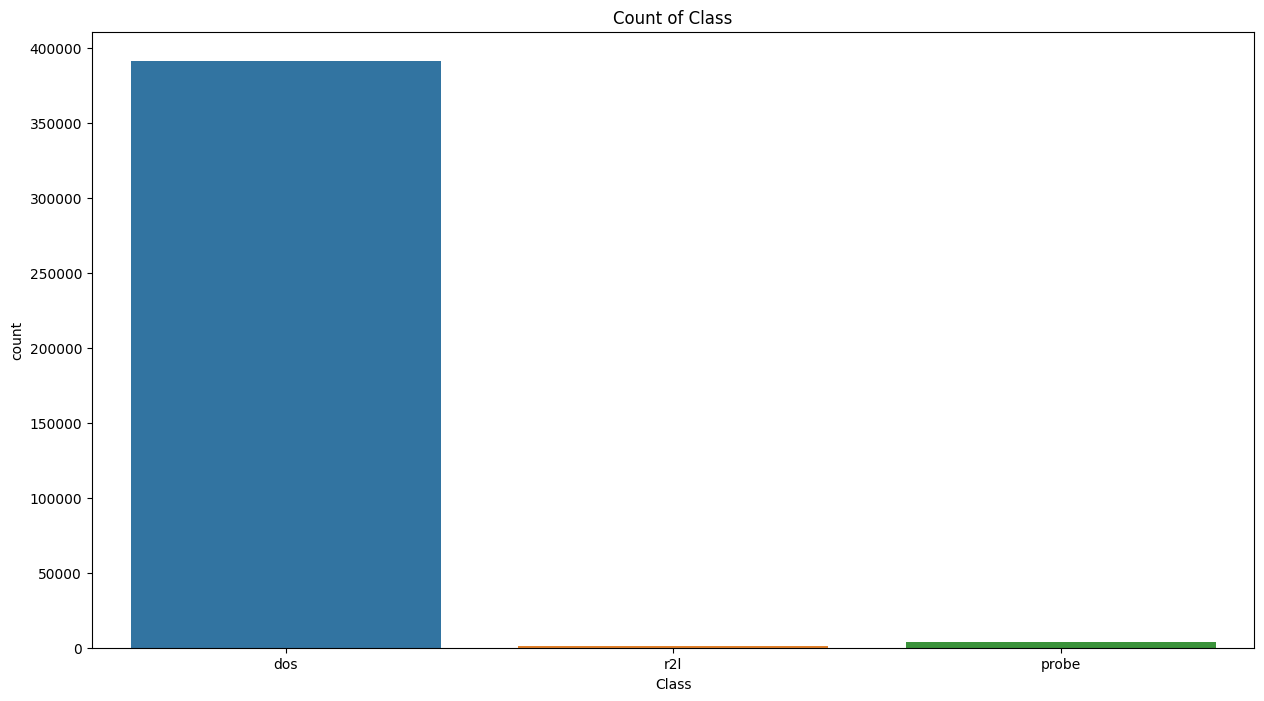

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=df, x='Class')

### <b><span style='color:#DEB078'>3.2 |</span><span style='color:#016CC9'> Delete unimportant features</span></b>

In [ ]:
# Finding categorical features
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols

['service', 'Class', 'flag', 'protocol_type']

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

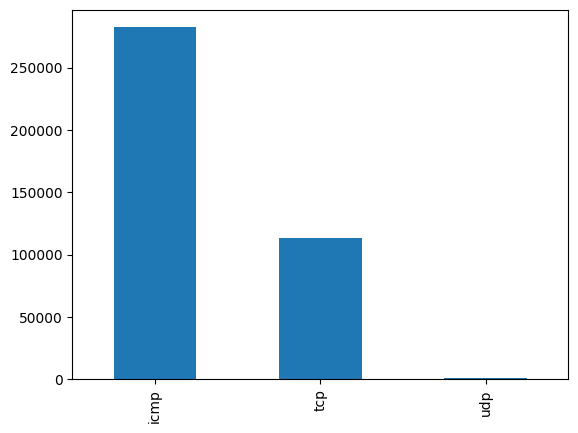

In [ ]:
bar_graph('protocol_type')

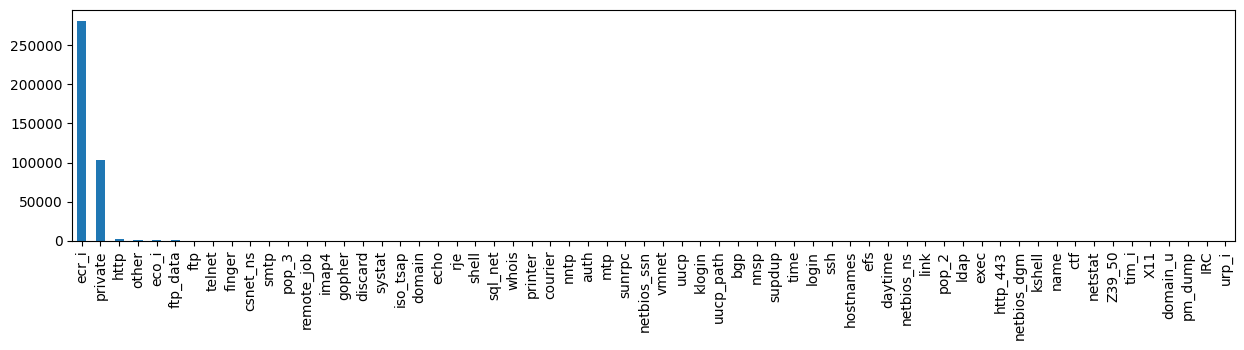

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

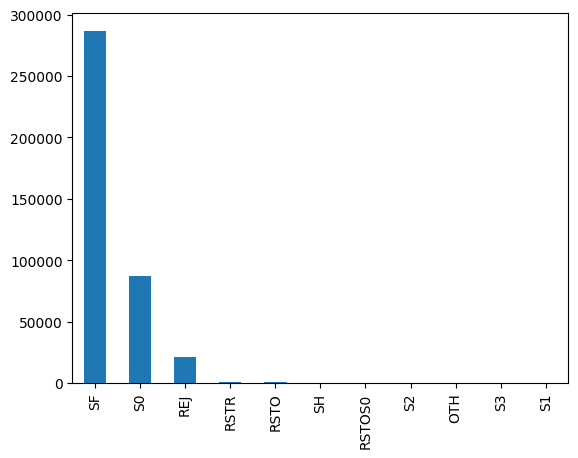

In [ ]:
bar_graph('flag')

In [ ]:
# convert categorical to numerical
number = preprocessing.LabelEncoder()
for name in cate_cols:
  df[name] = number.fit_transform(df[name])

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,54,5,0,0,0,0,0,0,...,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0,0
1,0,1,54,5,0,0,0,0,0,0,...,16,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0,0
2,0,0,14,9,1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0,0
3,0,0,14,9,1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0,0
4,0,0,14,9,1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0,0


<Axes: title={'center': 'Count of Class'}, xlabel='Class', ylabel='count'>

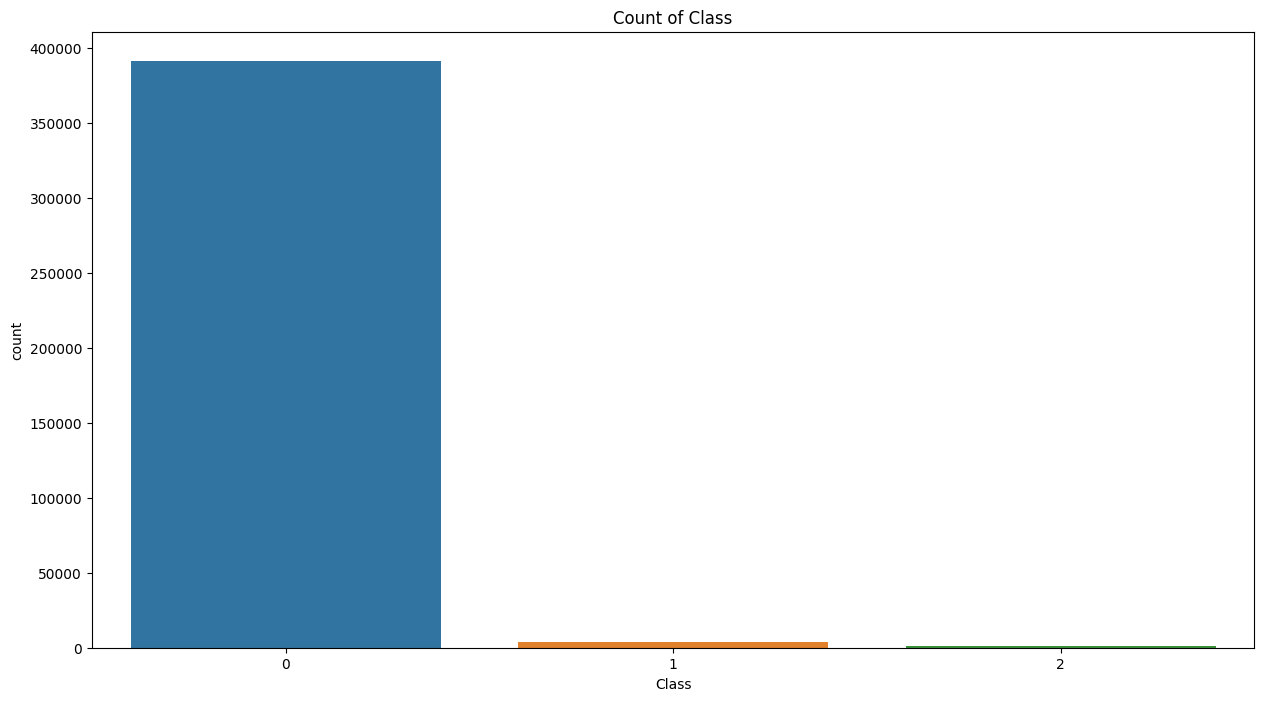

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=df, x='Class')
# dos      391458
# probe      4107
# r2l        1126

In [ ]:
# Display value counts each type of attacks
class_Label = df['Class'].value_counts()
print(class_Label)

0    391458
1      4107
2      1126
Name: Class, dtype: int64


In [ ]:
# The "is_host_login","num_outbound_cmds" features have only one value, so they do not impact the data
# The 'service' feature has more than 20 values, but since it predominantly focuses on the first two values, we will also disregard it in the analysis
df = df.drop(["is_host_login","num_outbound_cmds","service"],axis=1)


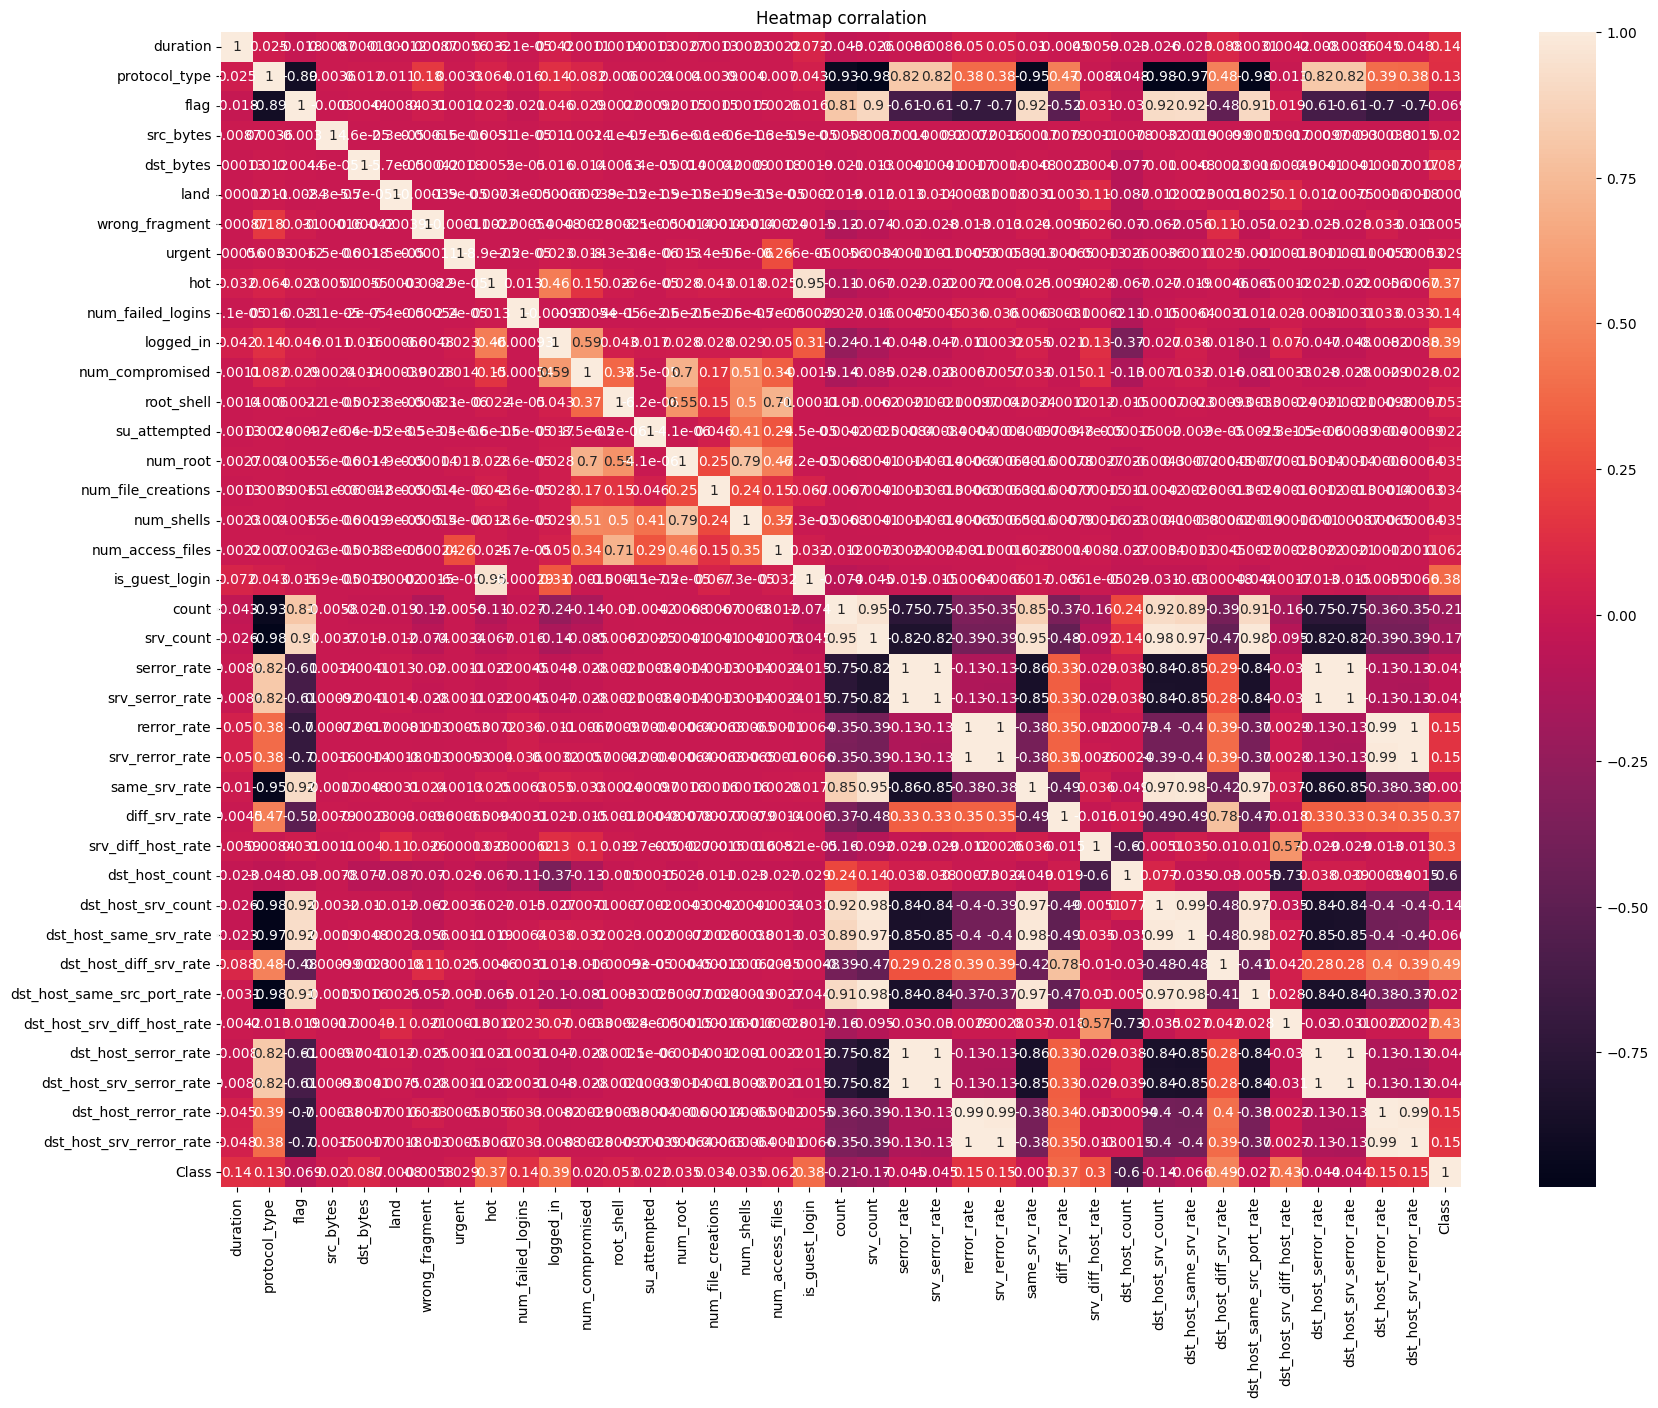

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Heatmap corralation')
sns.heatmap(data=pd.get_dummies(df).corr(), annot=True);

In [ ]:

# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

# # This variable is highly correlated with serror_rate and should be ignored for analysis.
# # (Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
# #(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)
# # This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)


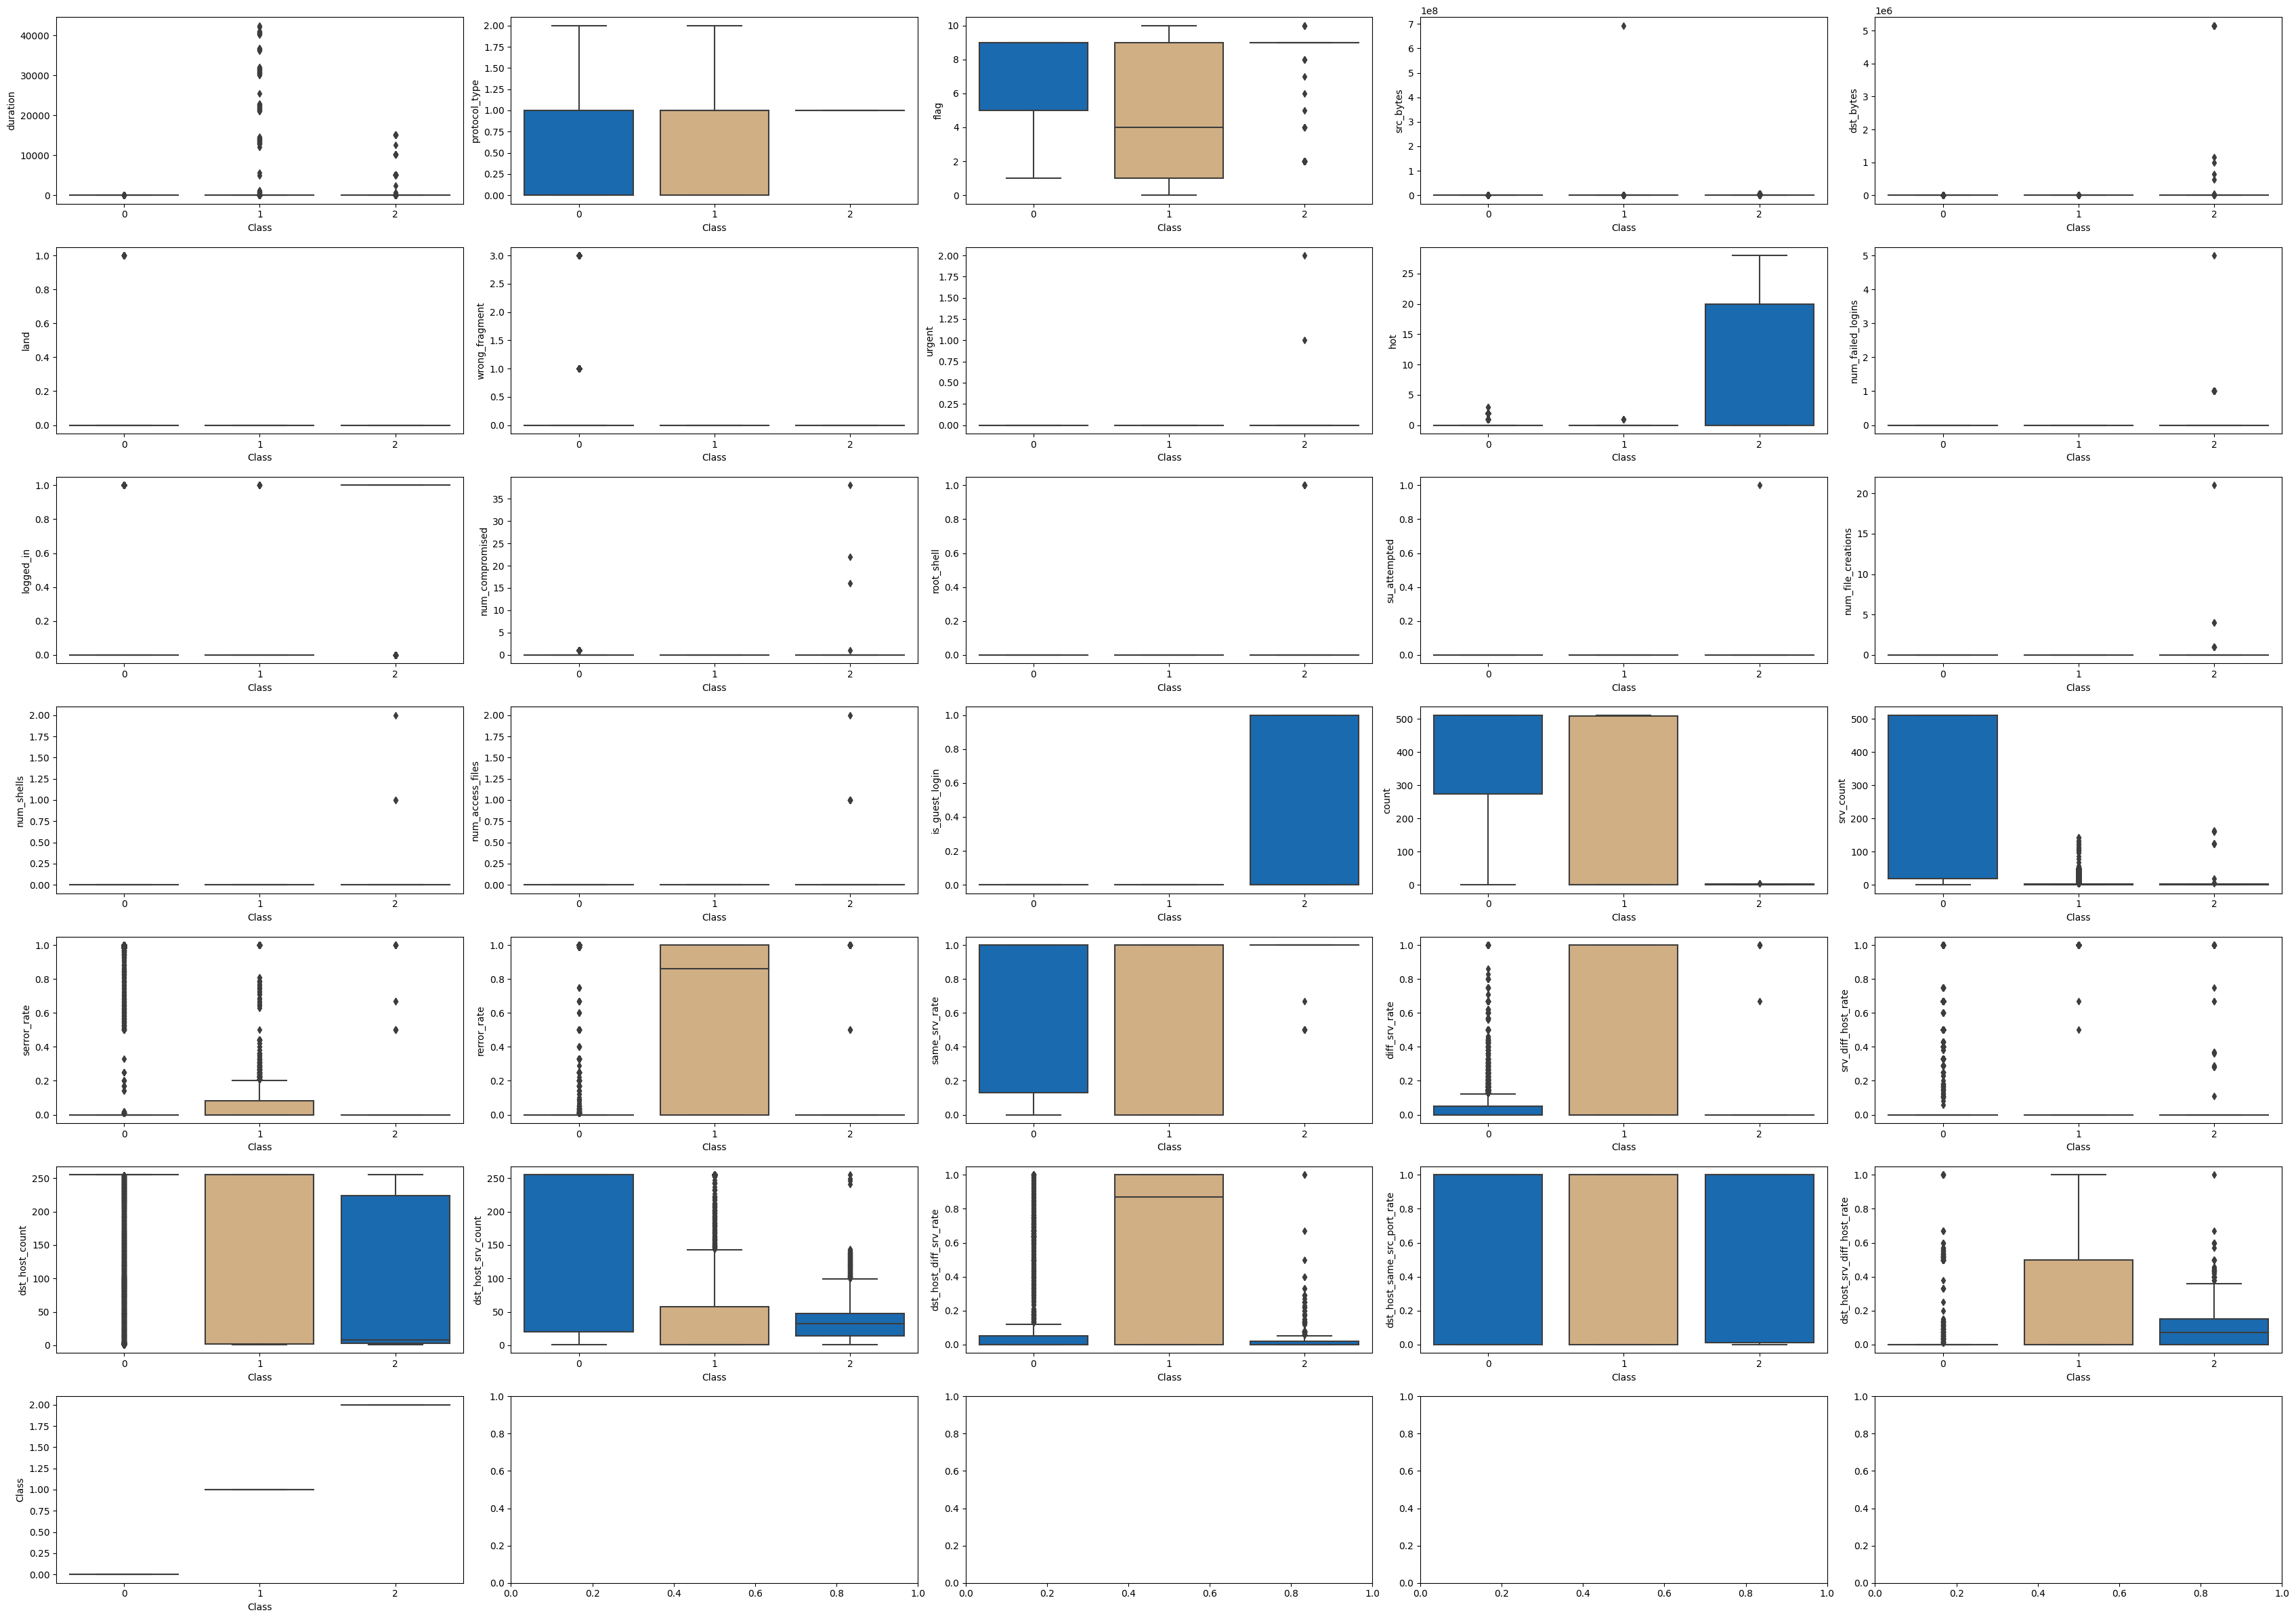

In [ ]:
p=df.select_dtypes(include='number').columns.to_list()
p.append("Class")
y=5
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(34,6*4))

for i in range(1,len(p)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,y=p[i-1],x='Class',palette=['#016CC9','#DEB078'])
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396691 entries, 0 to 396690
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     396691 non-null  int64  
 1   protocol_type                396691 non-null  int64  
 2   flag                         396691 non-null  int64  
 3   src_bytes                    396691 non-null  int64  
 4   dst_bytes                    396691 non-null  int64  
 5   land                         396691 non-null  int64  
 6   wrong_fragment               396691 non-null  int64  
 7   urgent                       396691 non-null  int64  
 8   hot                          396691 non-null  int64  
 9   num_failed_logins            396691 non-null  int64  
 10  logged_in                    396691 non-null  int64  
 11  num_compromised              396691 non-null  int64  
 12  root_shell                   396691 non-null  int64  
 13 

In [ ]:
class_means = df.groupby('Class').mean()
print(class_means.T)

Class                                 0              1              2
duration                       0.000725     485.029949     559.752220
protocol_type                  0.284534       0.740687       1.000000
flag                           7.695308       4.862187       8.684725
src_bytes                    977.053753  168832.725590  271972.574600
dst_bytes                     46.330853       0.449233   72304.944050
land                           0.000054       0.000000       0.000000
wrong_fragment                 0.008118       0.000000       0.000000
urgent                         0.000000       0.000000       0.002664
hot                            0.011048       0.000974       7.389876
num_failed_logins              0.000000       0.000000       0.049734
logged_in                      0.005628       0.002435       0.922735
num_compromised                0.005439       0.000000       0.068384
root_shell                     0.000000       0.000000       0.005329
su_attempted        


0.DoS (Distributed Denial of Service):

* Thời gian kết nối (duration): Thấp (gần 0).
* Loại giao thức(protocol_type):đa dạng
* Cờ (flag):trạng thái kết nói đa dạng
* Số byte: nguồn (src_bytes) cao và đích (dst_bytes) thấp
* Thông tin về trạng thái kết nối và tình trạng đăng nhập: Số lần truy cập đến máy chủ trong khoảng thời gian gần đây, địa chỉ nguồn và địa chỉ đích của gói tin là giống nhau, fragment bị lỗi trong gói tin,có trạng thái đăng nhập thành công và có cảnh báo hệ thống tương đối ít.
* Thông tin về số lần truy cập và đếm: Số lượng yêu cầu (count), Số lượng dịch vụ (srv_count): Cao.
* Tỉ lệ lỗi (serror_rate, rerror_rate,..): Cao.
* Thông tin về máy chủ đích: Hầu hết các kết nối đến cùng một máy chủ đích và sử dụng cùng một cổng nguồn.

1.Probe:
* Thời gian kết nối (duration): Cao.
* Loại giao thức(protocol_type):đa dạng
* Cờ (flag):trạng thái kết nói đa dạng
* Số byte: nguồn (src_bytes) rất cao và đích (dst_bytes) thấp
* Thông tin về trạng thái kết nối và tình trạng đăng nhập: Số lần truy cập đến máy chủ trong khoảng thời gian gần đây và trạng thái đăng nhập thành công tương đối ít.
* Thông tin về số lần truy cập và đếm: Số lượng yêu cầu (count) trung bình, Số lượng dịch vụ (srv_count): thấp.
* Tỉ lệ lỗi (serror_rate, rerror_rate,..): Cao.
* Thông tin về máy chủ đích:  Có sự đa dạng trong kết nối đến máy chủ đích và cổng nguồn.
2.Remote-to-Local (R2L):
* Thời gian kết nối (duration): Cao.
* Loại giao thức(protocol_type):1 loại
* Cờ (flag):trạng thái kết nói đa dạng
* Số byte: nguồn (src_bytes) rất cao và đích (dst_bytes) cao
* Thông tin về trạng thái kết nối và tình trạng đăng nhập:  Số lần truy cập đến máy chủ trong khoảng thời gian gần đây khá cao và trạng thái đăng nhập thành công rất cao. Kết nối có quyền root vàcố gắng sử dụng lệnh su,có tương tác với file và có một số lượng đáng kể kết nối có trạng thái là khách.
* Thông tin về số lần truy cập và đếm: Số lượng yêu cầu (count),Số lượng dịch vụ (srv_count): rất thấp
* Tỉ lệ lỗi (serror_rate, rerror_rate): Thấp.
* Thông tin về máy chủ đích: Hầu hết các kết nối đến cùng một máy chủ đích và sử dụng cùng một cổng nguồn.


## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>4 | MODELLING</div></b>

### <b><span style='color:#DEB078'>4.1 |</span><span style='color:#016CC9'> Spliting datas </span></b>

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
#Split your data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# from imblearn.over_sampling import SMOTE
# # Apply SMOTE for oversampling
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # Apply RandomUnderSampler for undersampling
# undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

### <b><span style='color:#DEB078'>4.2 |</span><span style='color:#016CC9'> Decision Tree model</span></b>

<b><span style='color:#DEB078'>4.2.1 |</span><span style='color:#016CC9'>Gini</span></b>

In [ ]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth= 11, random_state=42,min_samples_leaf=2,min_samples_split=3)
start_timeDT = time.time()
# Train the model on the training set
dt_classifier.fit(X_train, y_train)
end_timeDT = time.time()
# Make predictions on the test set
start_timeDTP = time.time()
y_predDT = dt_classifier.predict(X_test)
end_timeDTP = time.time()
accuracyDT=accuracy_score(y_test,y_predDT)
print("Classification Report:\n", classification_report(y_test, y_predDT))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       0.99      1.00      0.99       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339



In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(1, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth_normal = None
best_score_normal = 0.0
accuray=[]

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    dct_normal = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    # Fit the model to the training data
    dct_normal.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score_normal = dct_normal.score(X_test, y_test)
    accuray.append(test_score_normal)

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score_normal}")
    # Check if the current model has a better score than the previous best
    if test_score_normal > best_score_normal:
        best_score_normal = test_score_normal
        best_max_depth_normal = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth_normal}: Best Test Score = {best_score_normal}")

Max Depth = 1: Test Score = 0.992576160526349
Max Depth = 2: Test Score = 0.9959162580824059
Max Depth = 3: Test Score = 0.9982984408676692
Max Depth = 4: Test Score = 0.9992941680636257
Max Depth = 5: Test Score = 0.9994958343311612
Max Depth = 6: Test Score = 0.999584063323208
Max Depth = 7: Test Score = 0.9998235420159064
Max Depth = 8: Test Score = 0.9998991668662323
Max Depth = 9: Test Score = 0.9999117710079533
Max Depth = 10: Test Score = 0.9998991668662323
Max Depth = 11: Test Score = 0.9999369792913951
Max Depth = 12: Test Score = 0.9999369792913951
Max Depth = 13: Test Score = 0.9999369792913951
Max Depth = 14: Test Score = 0.9999369792913951
Max Depth = 15: Test Score = 0.9999369792913951
Max Depth = 16: Test Score = 0.9999369792913951
Max Depth = 17: Test Score = 0.9999369792913951
Max Depth = 18: Test Score = 0.9999369792913951
Max Depth = 19: Test Score = 0.9999369792913951
Best Max Depth = 11: Best Test Score = 0.9999369792913951


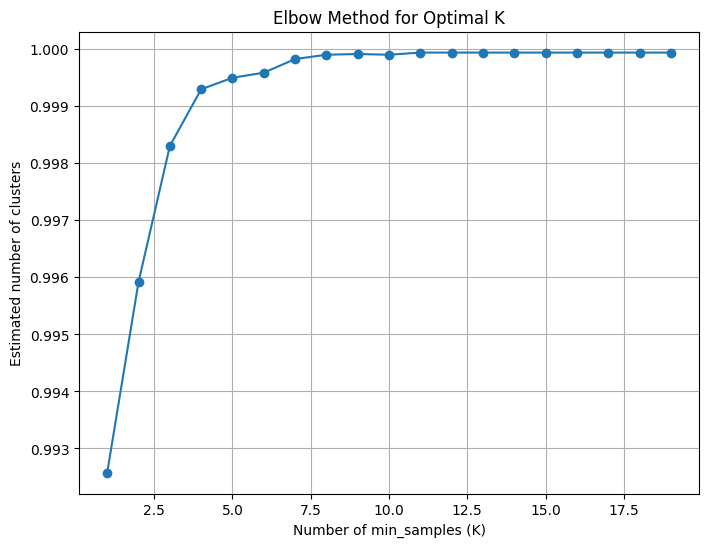

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuray, marker='o')
plt.xlabel('Number of min_samples (K)')
plt.ylabel('Estimated number of clusters')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

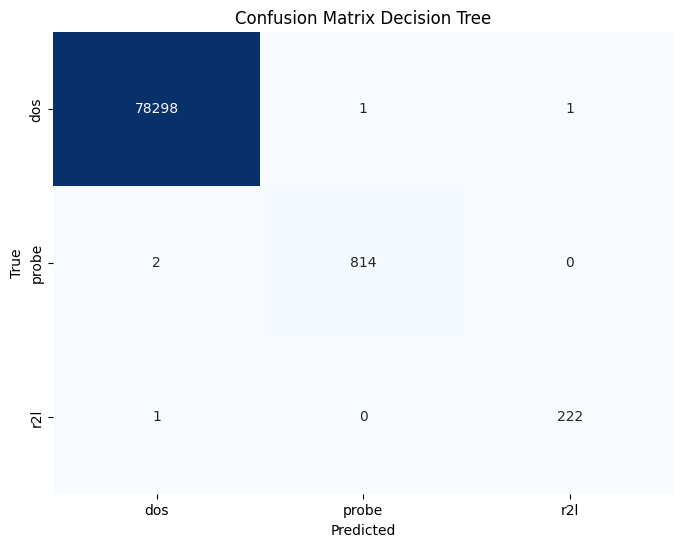

In [ ]:
# #Visualization

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predDT)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[ 'dos','probe', 'r2l'], yticklabels=[ 'dos','probe', 'r2l' ])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree')
plt.show()

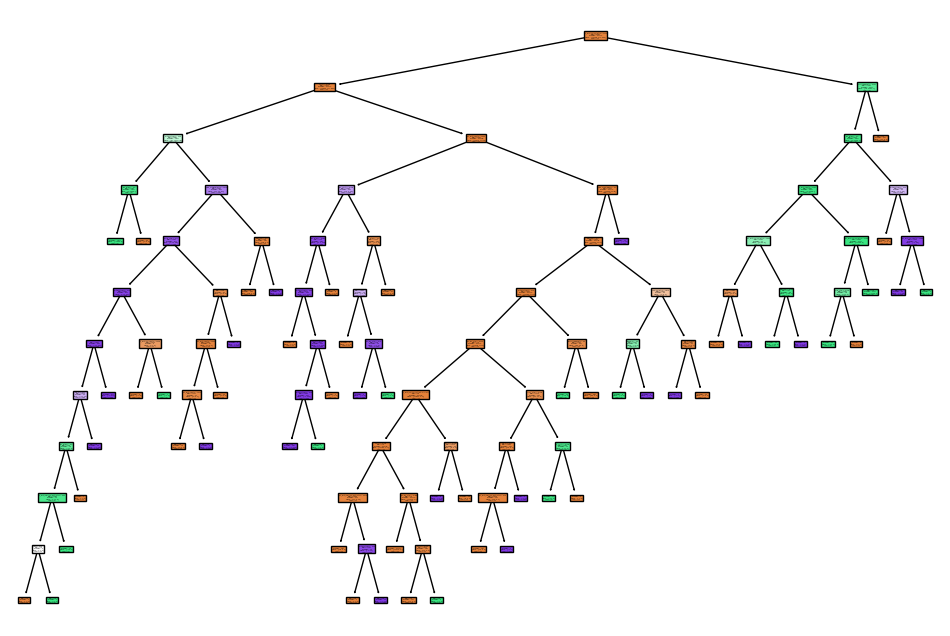

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=df.columns, class_names=['dos','r2l' ,'probe' ])
plt.show()

<b><span style='color:#DEB078'>4.2.2 |</span><span style='color:#016CC9'>Gini Weight</span></b>

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weights
class_labels = np.unique(y_train)
class_weights = compute_class_weight( class_weight='balanced', classes=class_labels,y= y_train)
class_weights_dict = dict(enumerate(class_weights))


In [ ]:
decision_tree_weight = DecisionTreeClassifier(class_weight=class_weights_dict,max_depth=12, random_state=42)

# Train the Decision Tree model
decision_tree_weight.fit(X_train,y_train)

# Make predictions on the test set
y_pred_weight = decision_tree_weight.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_weight))
print("Classification Report:\n", classification_report(y_test, y_pred_weight))

Accuracy: 0.9999621875748371
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       1.00      1.00      1.00       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339



In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_GNW_values = range(1, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth_GNW = None
best_score_GNW = 0.0
accuray_GNW =[]

# Iterate over different max_depth values
for max_depth in max_depth_GNW_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    dct = DecisionTreeClassifier(max_depth=max_depth,class_weight=class_weights_dict,random_state=42)
    # Fit the model to the training data
    dct.fit(X_train,y_train)
    # Evaluate the model on the test data
    test_score = dct.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(dct, X_train, y_train, cv=5).mean()
    accuray_GNW.append(test_score)
    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score_GNW:
        best_score_GNW = test_score
        best_max_depth_GNW = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth_GNW}: Best Test Score = {best_score_GNW}")

Max Depth = 1: Test Score = 0.012931849405714717
Max Depth = 2: Test Score = 0.7286328287475264
Max Depth = 3: Test Score = 0.9444157350105244
Max Depth = 4: Test Score = 0.9448064634038745
Max Depth = 5: Test Score = 0.9448694841124794
Max Depth = 6: Test Score = 0.9910888718032745
Max Depth = 7: Test Score = 0.9912023090787633
Max Depth = 8: Test Score = 0.9938743871236089
Max Depth = 9: Test Score = 0.9998487502993484
Max Depth = 10: Test Score = 0.9999117710079533
Max Depth = 11: Test Score = 0.9999369792913951
Max Depth = 12: Test Score = 0.9999621875748371
Max Depth = 13: Test Score = 0.9999621875748371
Max Depth = 14: Test Score = 0.9999495834331161
Max Depth = 15: Test Score = 0.9999621875748371
Max Depth = 16: Test Score = 0.9999621875748371
Max Depth = 17: Test Score = 0.9999621875748371
Max Depth = 18: Test Score = 0.9999621875748371
Max Depth = 19: Test Score = 0.9999621875748371
Best Max Depth = 12: Best Test Score = 0.9999621875748371


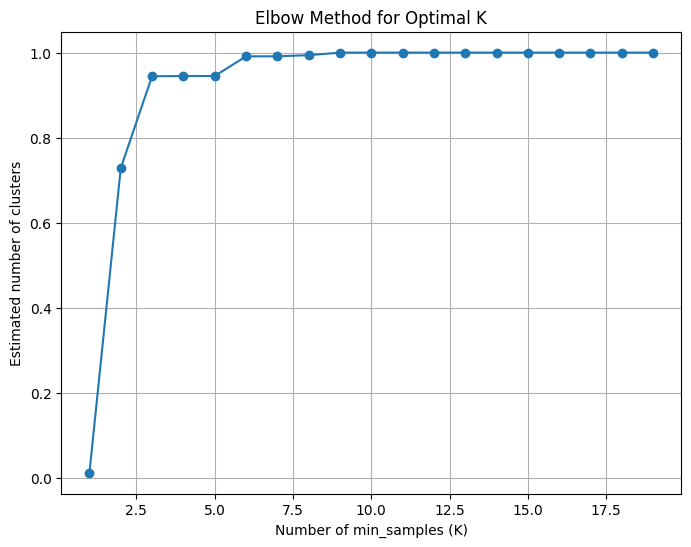

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_GNW_values, accuray_GNW, marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Optimal math_depth')
plt.grid(True)
plt.show()

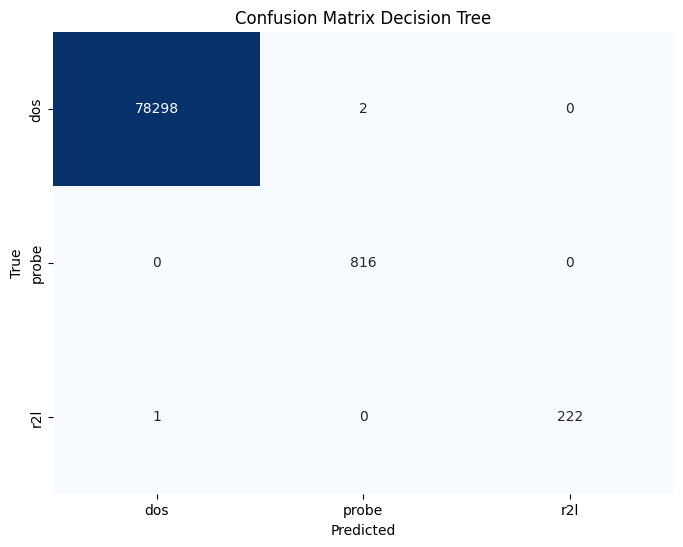

In [ ]:
# #Visualization

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_weight)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[ 'dos','probe', 'r2l'], yticklabels=[ 'dos','probe', 'r2l' ])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree')
plt.show()

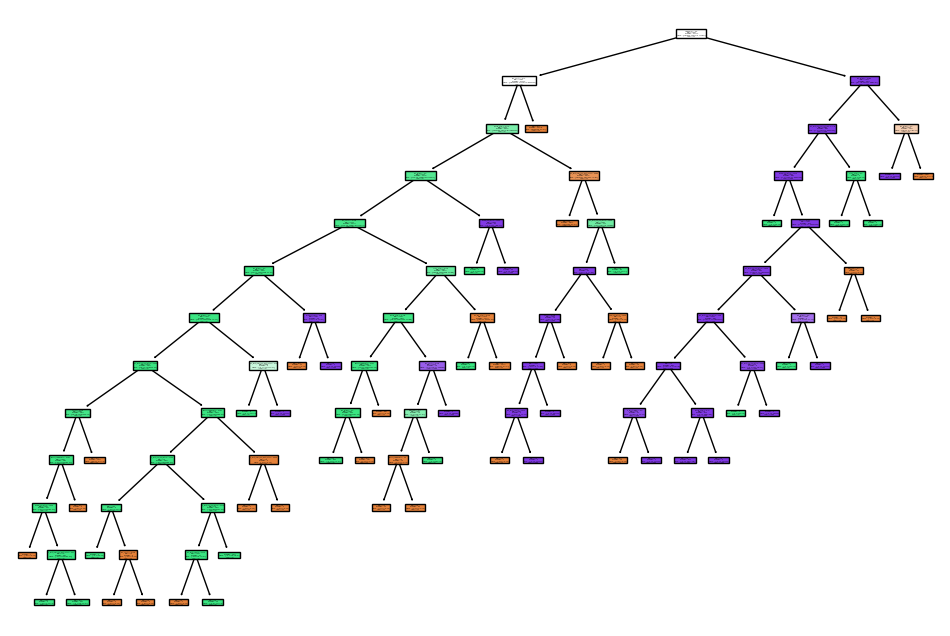

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_weight, filled=True, feature_names=df.columns, class_names=['dos','r2l' ,'probe' ])
plt.show()

<b><span style='color:#DEB078'>4.2.3 |</span><span style='color:#016CC9'>Entropy</span></b>

In [ ]:
# Initialize the Decision Tree classifier
dt_classifierIP = DecisionTreeClassifier(criterion="entropy",max_depth=10,random_state=42)
# Train the model on the training set
dt_classifierIP.fit(X_train, y_train)
# Make predictions on the test set
y_predDTIP = dt_classifierIP.predict(X_test)
# accuracyDT = accuracy_score(y_test, y_predDT)
print("Accuracy:", accuracy_score(y_test, y_predDTIP))
print("Classification Report:\n", classification_report(y_test, y_predDTIP))


Accuracy: 0.9998991668662323
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       1.00      0.99      0.99       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339



In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_EP_values = range(1, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth_EP = None
best_score_EP = 0.0
accuray_EP = []

# Iterate over different max_depth values
for max_depth in max_depth_EP_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf_EP = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy",random_state=42)
    # Fit the model to the training data
    clf_EP.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf_EP.score(X_test, y_test)
    accuray_EP.append(test_score)
    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score_EP:
        best_score_EP = test_score
        best_max_depth_EP = max_depth

# Print the best max depth and corresponding scoreca
print(f"Best Max Depth = {best_max_depth_EP}: Best Test Score = {best_score_EP}")

Max Depth = 1: Test Score = 0.9901057487490389
Max Depth = 2: Test Score = 0.9956893835314284
Max Depth = 3: Test Score = 0.9988026065365079
Max Depth = 4: Test Score = 0.9994958343311612
Max Depth = 5: Test Score = 0.9997983337324645
Max Depth = 6: Test Score = 0.9998361461576274
Max Depth = 7: Test Score = 0.9998613544410694
Max Depth = 8: Test Score = 0.9998865627245113
Max Depth = 9: Test Score = 0.9998739585827903
Max Depth = 10: Test Score = 0.9998991668662323
Max Depth = 11: Test Score = 0.9998991668662323
Max Depth = 12: Test Score = 0.9998991668662323
Max Depth = 13: Test Score = 0.9998991668662323
Max Depth = 14: Test Score = 0.9998991668662323
Max Depth = 15: Test Score = 0.9998991668662323
Max Depth = 16: Test Score = 0.9998991668662323
Max Depth = 17: Test Score = 0.9998991668662323
Max Depth = 18: Test Score = 0.9998991668662323
Max Depth = 19: Test Score = 0.9998991668662323
Best Max Depth = 10: Best Test Score = 0.9998991668662323


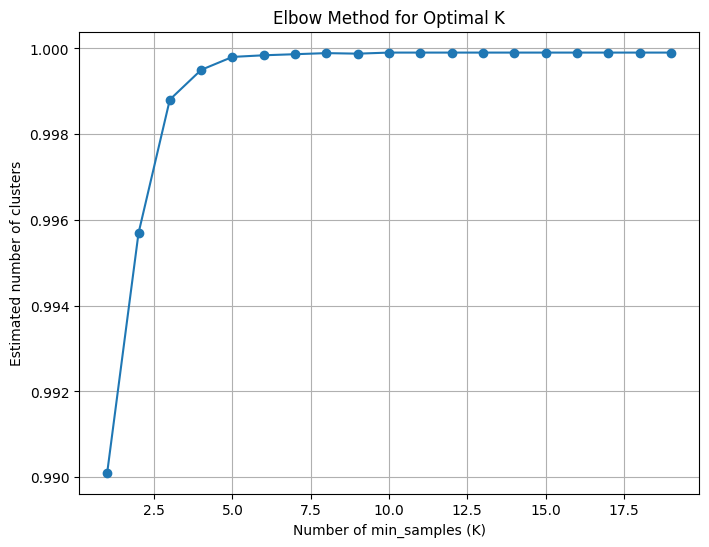

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_EP_values, accuray_EP, marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Optimal math_depth')
plt.grid(True)
plt.show()

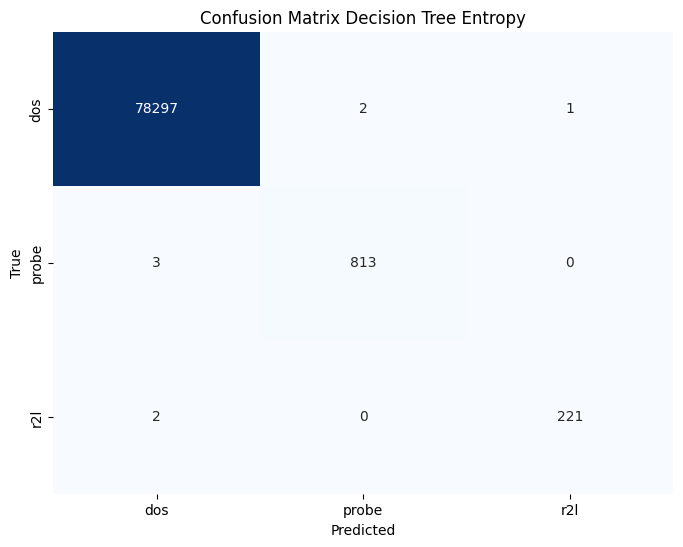

In [ ]:
# #Visualization

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predDTIP)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[  'dos','probe', 'r2l'], yticklabels=[ 'dos','probe', 'r2l'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree Entropy')
plt.show()

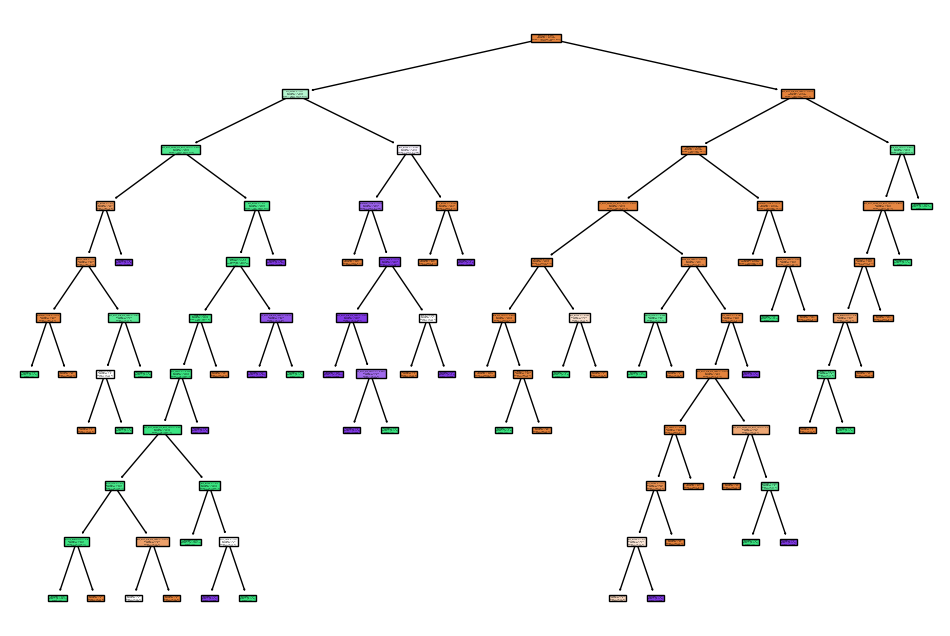

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifierIP, filled=True, feature_names=df.columns, class_names=['dos' ,'r2l' ,'probe' ])
plt.show()

<b><span style='color:#DEB078'>4.2.4 |</span><span style='color:#016CC9'>Entropy weight</span></b>

In [ ]:
decision_tree_weight_EP = DecisionTreeClassifier(class_weight=class_weights_dict,max_depth=11,criterion="entropy",random_state=25)

# Train the Decision Tree model
decision_tree_weight_EP.fit(X_train, y_train)

# Make predictions on the test set
y_pred_weight_EP = decision_tree_weight_EP.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_weight_EP))
print("Classification Report:\n", classification_report(y_test, y_pred_weight_EP))

Accuracy: 0.9999369792913951
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       1.00      1.00      1.00       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339



In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_epw_values = range(1, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth_EPW = None
best_score_EPW = 0.0
accuracy_EPW = []

# Iterate over different max_depth values
for max_depth in max_depth_epw_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy",class_weight=class_weights_dict,random_state=25)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    accuracy_EPW.append(test_score)
    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score_EPW:
        best_score_EPW = test_score
        best_max_depth_EPW = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth_EPW}: Best Test Score = {best_score_EPW}")

Max Depth = 1: Test Score = 0.012931849405714717
Max Depth = 2: Test Score = 0.7286328287475264
Max Depth = 3: Test Score = 0.9444157350105244
Max Depth = 4: Test Score = 0.9448064634038745
Max Depth = 5: Test Score = 0.9448694841124794
Max Depth = 6: Test Score = 0.9973279219551545
Max Depth = 7: Test Score = 0.9973279219551545
Max Depth = 8: Test Score = 0.9982102118756223
Max Depth = 9: Test Score = 0.9998865627245113
Max Depth = 10: Test Score = 0.9999117710079533
Max Depth = 11: Test Score = 0.9999369792913951
Max Depth = 12: Test Score = 0.9999369792913951
Max Depth = 13: Test Score = 0.9999369792913951
Max Depth = 14: Test Score = 0.9999369792913951
Max Depth = 15: Test Score = 0.9999369792913951
Max Depth = 16: Test Score = 0.9999369792913951
Max Depth = 17: Test Score = 0.9999369792913951
Max Depth = 18: Test Score = 0.9999369792913951
Max Depth = 19: Test Score = 0.9999369792913951
Best Max Depth = 11: Best Test Score = 0.9999369792913951


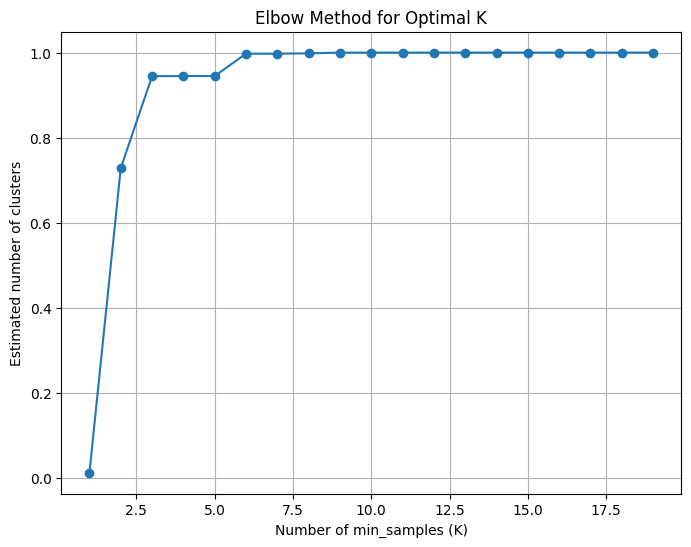

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_epw_values, accuracy_EPW, marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Optimal math_depth')
plt.grid(True)
plt.show()

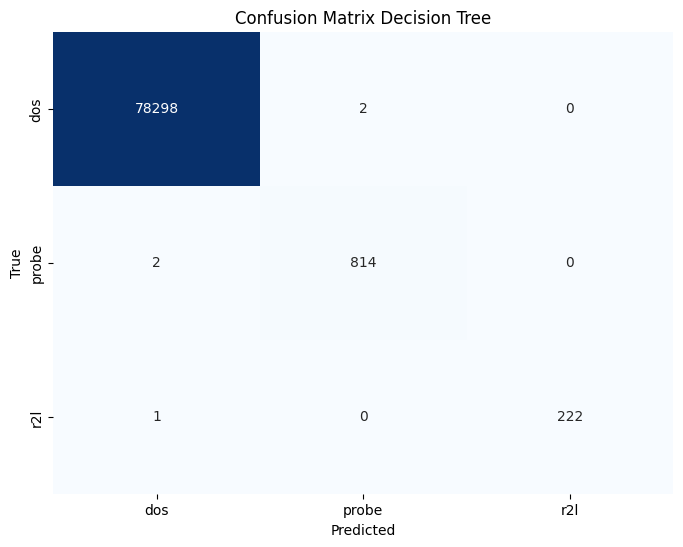

In [ ]:
# #Visualization

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_weight_EP)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[  'dos','probe', 'r2l'], yticklabels=[ 'dos','probe', 'r2l'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree')
plt.show()

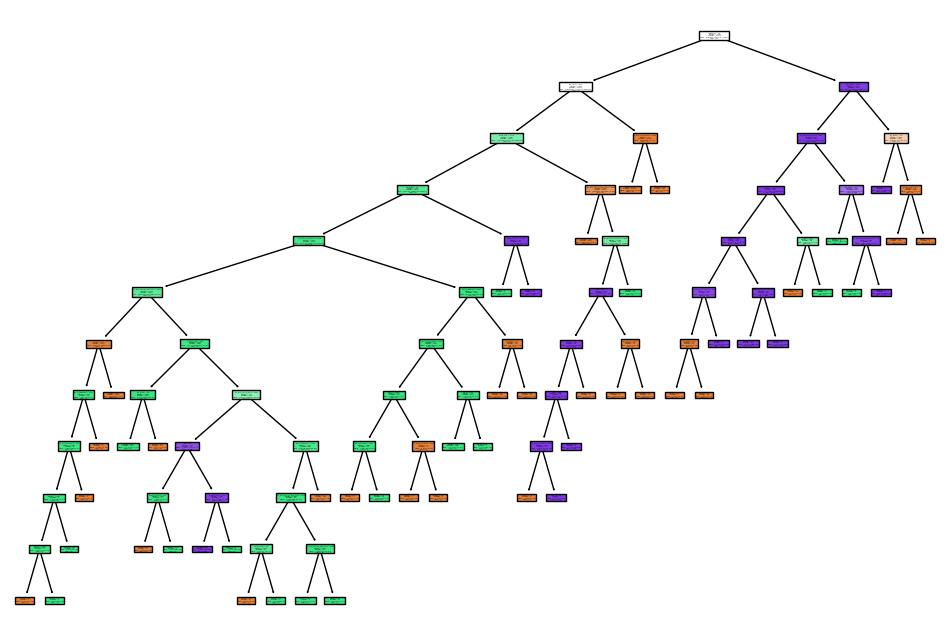

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_weight_EP, filled=True, feature_names=df.columns, class_names=['dos' ,'r2l' ,'probe' ])
plt.show()

### <b><span style='color:#DEB078'>4.3 |</span><span style='color:#016CC9'> RandomForest model</span></b>

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Định nghĩa mô hình RandomForest
# rf_model = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [100, 200,300],
#     # 'max_depth': range(3,20),
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Tạo đối tượng GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Thực hiện tìm kiếm trên lưới tham số
# grid_search.fit(X_train, y_train)

# # In ra các tham số tốt nhất
# print("Best Parameters:", grid_search.best_params_)

# # In ra độ chính xác trên tập kiểm thử với các tham số tốt nhất
# best_model = grid_search.best_estimator_
# accuracy = best_model.score(X_test, y_test)
# print("Accuracy on Test Set:", accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFR = RandomForestClassifier()
start_timeRF = time.time()
RFR.fit(X_train, y_train)
end_timeRF = time.time()
start_timeRFP = time.time()
y_predRF=RFR.predict(X_test)
end_timeRFP = time.time()
feature_importances = RFR.feature_importances_

scoreRF = accuracy_score(y_test,y_predRF)
print("Accuracy on Test Set:", accuracy_score(y_test,y_predRF))
print("Classification Report:\n", classification_report(y_test, y_predRF))


Accuracy on Test Set: 0.999974791716558
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       1.00      1.00      1.00       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339



In [ ]:
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

for f in range(len(indices)):
    most_important_feature_name = df.columns[indices[f]]
    print(f"{f + 1}. Feature {indices[f]}: Name = {most_important_feature_name}, Importance = {feature_importances[indices[f]]}")

1. Feature 27: Name = dst_host_diff_srv_rate, Importance = 0.20413906850346844
2. Feature 18: Name = count, Importance = 0.1698197667494733
3. Feature 23: Name = diff_srv_rate, Importance = 0.08320766117681154
4. Feature 29: Name = dst_host_srv_diff_host_rate, Importance = 0.07781832363000557
5. Feature 25: Name = dst_host_count, Importance = 0.06609784507227548
6. Feature 19: Name = srv_count, Importance = 0.054276108985876606
7. Feature 3: Name = src_bytes, Importance = 0.040737888344109505
8. Feature 28: Name = dst_host_same_src_port_rate, Importance = 0.03253980082698125
9. Feature 10: Name = logged_in, Importance = 0.029624442920473837
10. Feature 24: Name = srv_diff_host_rate, Importance = 0.02891107586886537
11. Feature 26: Name = dst_host_srv_count, Importance = 0.028211103438052533
12. Feature 20: Name = serror_rate, Importance = 0.02725866073254854
13. Feature 22: Name = same_srv_rate, Importance = 0.02003988574626485
14. Feature 21: Name = rerror_rate, Importance = 0.0195474

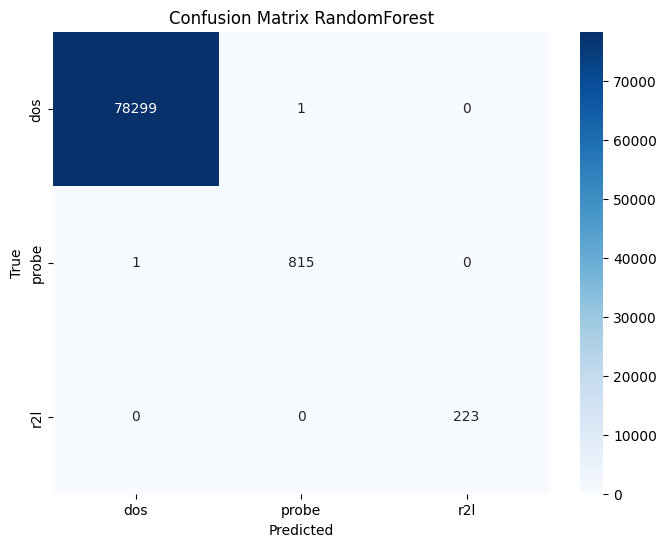

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predRF)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['dos' ,'probe' ,'r2l' ], yticklabels=['dos' ,'probe' ,'r2l'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix RandomForest')
plt.show()

In [ ]:
#Find the best n_estimator for DT algorithm
# Define a range of n_estimator values to iterate over
n_estimator_values = [100,200,300]  # You can adjust this range

# Initialize variables to keep track of the best n_estimator and corresponding score
best_n_estimator = None
best_score = 0.0

# Iterate over different n_estimator values
for n_estimator in n_estimator_values:
    # Initialize the DecisionTreeClassifier with the current n_estimator
    rfr = RandomForestClassifier(n_estimators=n_estimator )
    rfr.fit(X_train, y_train)
    # y_predRD = rfr.predict(X_test)
    # Evaluate the model on the test data
    test_score = rfr.score(X_test, y_test)
    # Print the score for the current n_estimator
    print(f"n_estimator = {n_estimator}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_n_estimator = n_estimator

# Print the best n_estimator and corresponding score
print(f"Best n_estimator = {best_n_estimator}: Best Test Score = {best_score}")

n_estimator = 100: Test Score = 0.999974791716558
n_estimator = 200: Test Score = 0.999974791716558
n_estimator = 300: Test Score = 0.999974791716558
Best n_estimator = 100: Best Test Score = 0.999974791716558


### <b><span style='color:#DEB078'>4.5 |</span><span style='color:#016CC9'> GRADIENT BOOSTING CLASSIFIER Model</span></b>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=200,
                                 learning_rate=0.01,
                                           max_depth=4)
start_timeGb = time.time()
# Train the model
gb_classifier.fit(X_train, y_train)
end_timeGB = time.time()
# Make predictions
start_timeGBP = time.time()
y_pred2 = gb_classifier.predict(X_test)
end_timeGBP = time.time()
# Evaluate the model on the test data
accuracyGB = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracyGB)
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.999987395858279
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78300
           1       1.00      1.00      1.00       816
           2       1.00      1.00      1.00       223

    accuracy                           1.00     79339
   macro avg       1.00      1.00      1.00     79339
weighted avg       1.00      1.00      1.00     79339



In [ ]:
feature_importances_=gb_classifier.feature_importances_

In [ ]:
indices = sorted(range(len(feature_importances_)), key=lambda k: feature_importances_[k], reverse=True)
for f in range(len(indices)):
    most_important_feature_name = df.columns[indices[f]]
    print(f"{f + 1}. Feature {indices[f]}: Name = {most_important_feature_name}, Importance = {feature_importances_[indices[f]]}")

1. Feature 27: Name = dst_host_diff_srv_rate, Importance = 0.326029522559612
2. Feature 18: Name = count, Importance = 0.17224871291561458
3. Feature 29: Name = dst_host_srv_diff_host_rate, Importance = 0.12510645891995228
4. Feature 23: Name = diff_srv_rate, Importance = 0.09766065924597564
5. Feature 6: Name = wrong_fragment, Importance = 0.07247868189551626
6. Feature 11: Name = num_compromised, Importance = 0.03080462371529174
7. Feature 3: Name = src_bytes, Importance = 0.027775230461330923
8. Feature 1: Name = protocol_type, Importance = 0.025023407310450753
9. Feature 8: Name = hot, Importance = 0.020212146150835584
10. Feature 25: Name = dst_host_count, Importance = 0.01929023598730322
11. Feature 26: Name = dst_host_srv_count, Importance = 0.016278624376488658
12. Feature 28: Name = dst_host_same_src_port_rate, Importance = 0.01549835428408738
13. Feature 9: Name = num_failed_logins, Importance = 0.01503082893302887
14. Feature 2: Name = flag, Importance = 0.009152536252344634

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Định nghĩa mô hình RandomForest
# rf_model = GradientBoostingClassifier()
# param_grid = {
#     'n_estimators': [100, 200,300],
#     'max_depth': [3,4,5],
#     'learning_rate': [0.05, 0.1, 0.2],
# }

# # Tạo đối tượng GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Thực hiện tìm kiếm trên lưới tham số
# grid_search.fit(X_train, y_train)

# # In ra các tham số tốt nhất
# print("Best Parameters:", grid_search.best_params_)

# # In ra độ chính xác trên tập kiểm thử với các tham số tốt nhất
# best_model = grid_search.best_estimator_
# accuracy = best_model.score(X_test, y_test)
# print("Accuracy on Test Set:", accuracy)

In [ ]:
#Find the best n_estimators for DT algorithm
# Define a range of n_estimators values to iterate over
max_n_estimators = range(3,10)  # You can adjust this range

# Initialize variables to keep track of the best n_estimators and corresponding score
best_n_estimators = None
best_score = 0.0

# Iterate over different n_estimators values
for n_estimators in max_n_estimators:
    # Initialize the DecisionTreeClassifier with the current n_estimators
    gbc = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,
                                           max_depth=n_estimators)
    gbc.fit(X_train, y_train)
    # y_predRD = gbc.predict(X_test)
    # Evaluate the model on the test data
    test_score = gbc.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(gbc, X_train, y_train, cv=5).mean()

    # Print the score for the current n_estimators
    print(f"n_estimators = {n_estimators}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_n_estimators = n_estimators

# Print the best n_estimators and corresponding score
print(f"Best n_estimators = {best_n_estimators}: Best Test Score = {best_score}")

n_estimators = 3: Test Score = 0.9999495834331161
n_estimators = 4: Test Score = 0.999987395858279
n_estimators = 5: Test Score = 0.9999621875748371
n_estimators = 6: Test Score = 0.999974791716558


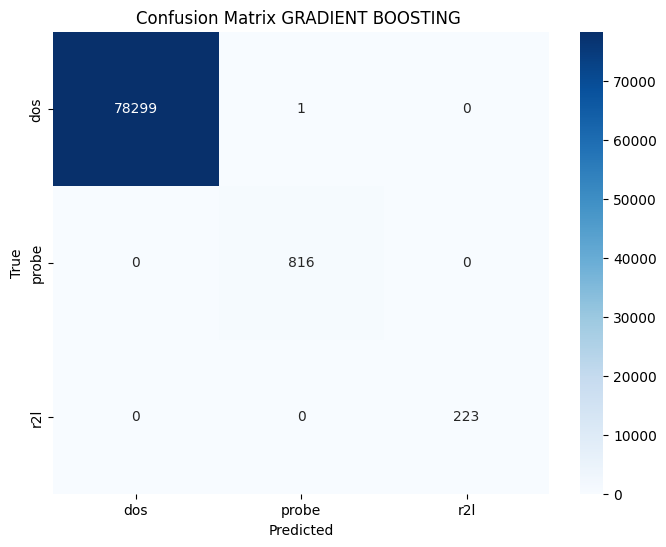

In [ ]:
cmGBC = confusion_matrix(y_test, y_pred2)
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmGBC, annot=True, fmt='d', cmap='Blues', xticklabels=['dos','probe' ,'r2l' ], yticklabels=['dos','probe' ,'r2l' ])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix GRADIENT BOOSTING ')
plt.show()

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>5 | Evaluation all the models</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#016CC9'> Evaluation Accuracy</span></b>

[0.9999369792913951, 0.999974791716558, 0.999987395858279]


<BarContainer object of 3 artists>

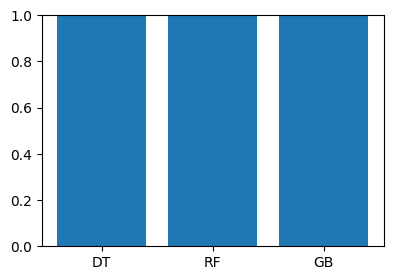

In [ ]:
names = ['DT','RF','GB']
values = [accuracyDT,scoreRF,accuracyGB]
print(values)
f = plt.figure(figsize=(15,3),num=1)
plt.subplot(131)
plt.ylim(0,1)
plt.bar(names,values)

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#016CC9'> Evaluation Time training</span></b>

<BarContainer object of 3 artists>

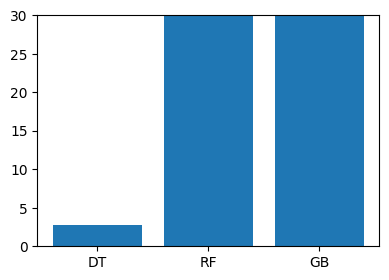

In [ ]:
names = ['DT','RF','GB']
values = [end_timeDT-start_timeDT,end_timeRF-start_timeRF,end_timeGB-start_timeGb]
f = plt.figure(figsize=(15,3),num=1)
plt.subplot(131)
plt.ylim(0,30)
plt.bar(names,values)

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#016CC9'> Evaluation Time predicting</span></b>

<BarContainer object of 3 artists>

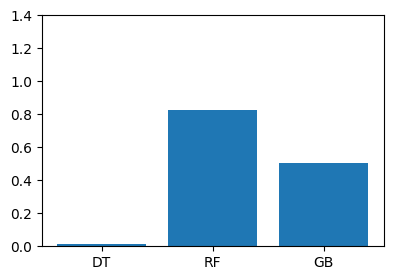

In [ ]:
names = ['DT','RF','GB']
values = [end_timeDTP-start_timeDTP,end_timeRFP-start_timeRFP,end_timeGBP-start_timeGBP]
f = plt.figure(figsize=(15,3),num=1)
plt.subplot(131)
plt.ylim(0,1.4)
plt.bar(names,values)

In [ ]:
newData = pd.read_csv("/content/sample_data/Book3(AutoRecovered).csv")

In [ ]:
newData = newData.dropna()

In [ ]:
# these are two feature only have one value so they dont affect to data
newData = newData.drop(["is_host_login","num_outbound_cmds","Class","Unnamed: 42"],axis=1)
# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
newData.drop('num_root', axis = 1, inplace = True)

# # This variable is highly correlated with serror_rate and should be ignored for analysis.
# # (Correlation = 0.9983615072725952)
newData.drop('srv_serror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9947309539817937)
newData.drop('srv_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
# #(Correlation = 0.9993041091850098)
newData.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9869947924956001)
newData.drop('dst_host_serror_rate', axis = 1, inplace = True)
# # This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9821663427308375)
newData.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9851995540751249)
newData.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# # This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
# #(Correlation = 0.9865705438845669)
newData.drop('dst_host_same_srv_rate', axis = 1, inplace = True)
newData.drop('service', axis = 1, inplace = True)

In [ ]:
num_cols = newData._get_numeric_data().columns
cate_cols = list(set(newData.columns)-set(num_cols))
number = preprocessing.LabelEncoder()
for name in cate_cols:
  newData[name] = number.fit_transform(newData[name])

In [ ]:
newData.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,2,4,1,0,0,0,0,0,0,...,0.0,0.00,0.17,0.67,0.0,150,1,0.06,0.03,0.0
1,3,1,4,54,114,0,0,0,0,0,...,0.0,0.29,0.14,0.71,0.0,160,29,0.08,0.01,0.0
2,0,0,4,20,0,0,0,0,0,0,...,0.0,0.00,1.00,0.00,0.0,255,1,0.02,0.00,0.0
3,192,1,4,119,426,0,0,0,2,0,...,0.0,0.00,1.00,0.00,0.0,255,1,0.01,0.00,0.0
4,179,1,4,87,319,0,0,0,1,0,...,0.0,0.00,1.00,0.00,0.0,255,2,0.01,0.00,0.0


In [ ]:
tfdata = sc.fit_transform(newData)
tfdata

array([[0.        , 1.        , 0.8       , ..., 0.06      , 0.03      ,
        0.        ],
       [0.00890208, 0.5       , 0.8       , ..., 0.08      , 0.01      ,
        0.        ],
       [0.        , 0.        , 0.8       , ..., 0.02      , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.8       , ..., 0.75      , 0.5       ,
        0.        ],
       [0.        , 0.5       , 1.        , ..., 0.71      , 0.5       ,
        0.        ],
       [0.        , 0.5       , 1.        , ..., 0.75      , 0.67      ,
        0.        ]])

In [ ]:

dtp = dt_classifier.predict(tfdata)
print(dtp)
print("---DTreeGiniWeight---")
dtp1 = decision_tree_weight.predict(tfdata)
print(dtp1)
print("---DTreeEntropy---")
dtpip1 = dt_classifierIP.predict(tfdata)
print(dtpip1)
print("---DTreeEntropyWeight---")
dtpip = decision_tree_weight_EP.predict(tfdata)
print(dtpip)
print("--Random forest----")
rf = RFR.predict(tfdata)
print(rf)
print("---Gradient boosting---")
gb = gb_classifier.predict(tfdata)
print(gb)
# rg = model.predict(tfdata)
# print(rg)
# satan.probe 1
# multihop.r2l 2
# land.ddos 0

[1 1 0 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 1 1]
---DTreeGiniWeight---
[2 1 0 0 0 2 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2 2 1 2 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 0 1 1]
---DTreeEntropy---
[1 0 0 2 2 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 1 2 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 1 1]
---DTreeEntropyWeight---
[1 1 1 0 0 2 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2 2 1 2 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 1 1 1]
--Random forest----
[1 1 0 2 2 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 1 1]
---Gradient boosting---
[1 1 0 2 2 0 0 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 2 2 2 2 0 0 2 0 2 2 2 1 1 1]
